In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env

In [18]:
# change setting to show all columns
pd.set_option('display.max_columns', None)

In [6]:
# Use function to connect to Codeup database 

def get_connection(db, user=env.user, host=env.host, password=env.password):
    '''
    This function takes in user credentials from an env.py file and a database name and creates a connection to the Codeup database through a connection string 
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [7]:
# Use function to conduct and read in SQL query

zillow_sql_query =  '''
                    select bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, 
                    taxvaluedollarcnt, yearbuilt, taxamount, fips
                    from properties_2017
                    join propertylandusetype using(propertylandusetypeid)
                    where propertylandusedesc = 'Single Family Residential';
                    '''

def query_zillow_data():
    '''
    This function uses the get_connection function to connect to the zillow database and returns the zillow_sql_query read into a pandas dataframe
    '''
    return pd.read_sql(zillow_sql_query,get_connection('zillow'))

In [8]:
# Assign dataframe to a variable
df = query_zillow_data()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [9]:
# Check dataframe shape
df.shape

(2152863, 7)

In [10]:
# Check columns, data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


In [11]:
# Check statistical information for numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


In [13]:
# check categorical column values
col_list = df[['bedroomcnt', 'bathroomcnt']]
for col in col_list:
    print(df[col].value_counts(dropna=False))

3.0     964298
4.0     634289
2.0     335473
5.0     150866
6.0      25166
1.0      23166
0.0      13187
7.0       4807
8.0       1107
9.0        291
10.0       121
11.0        34
13.0        16
12.0        12
NaN         11
14.0         7
15.0         6
18.0         3
16.0         2
25.0         1
Name: bedroomcnt, dtype: int64
2.00     943589
3.00     422841
1.00     414324
2.50     142981
4.00      82155
1.50      31211
3.50      28518
5.00      28362
4.50      19506
0.00      13027
6.00      10747
5.50       6217
7.00       4394
8.00       1692
6.50       1333
9.00        713
7.50        384
10.00       325
11.00       146
8.50        110
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
NaN          11
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
14.50         1
32.00         1
19.50         1
19.00         1
Name: bathroomcnt, dtype: int64


## Acquire and Summarize Takeaways

- Bedroomcnt, yearbuilt, and fips need to be converted to int datatype
- There are some outliers in regards to bedroomcnt and bathroomcnt
- Bedroomcnt and bathroom cnt both have 11 NaN values (possibly for the same observations)
- How does a house have zero bathrooms? Is this an error for these 13,027 observations?

In [14]:
# check for nulls
df.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [27]:
# check if null bedroomcnt & bathroomcnt values are for the same observations
df[df.bedroomcnt.isnull()]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
107763,NaN,NaN,NaN,67366.0,1926.0,780.54,6059.0
118612,NaN,NaN,NaN,43992.0,1946.0,541.64,6059.0
193993,NaN,NaN,1348.0,840698.0,1952.0,NaN,6059.0
1141339,NaN,NaN,200.0,188972.0,NaN,NaN,6037.0
1324608,NaN,NaN,990.0,435000.0,1906.0,NaN,6037.0
1442975,NaN,NaN,NaN,273196.0,NaN,NaN,6037.0
1647346,NaN,NaN,400.0,28347.0,1954.0,NaN,6037.0
1701026,NaN,NaN,NaN,407930.0,1926.0,NaN,6037.0
1722707,NaN,NaN,NaN,477161.0,NaN,NaN,6037.0
1776422,NaN,NaN,NaN,38855.0,NaN,NaN,6037.0


In [30]:
# drop rows with null values since it is only a small portion of the dataframe 
df = df.dropna()
df.shape

(2140235, 7)

In [31]:
# check that there are no more nulls
df.isnull().any()

bedroomcnt                      False
bathroomcnt                     False
calculatedfinishedsquarefeet    False
taxvaluedollarcnt               False
yearbuilt                       False
taxamount                       False
fips                            False
dtype: bool

In [36]:
# Change data types where a float does not make sense
df = df.astype({'bedroomcnt':'int', 'yearbuilt':'int', 'fips':'int'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    int64  
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     int64  
 5   taxamount                     float64
 6   fips                          int64  
dtypes: float64(4), int64(3)
memory usage: 130.6 MB


In [37]:
df.columns.tolist()

['bedroomcnt',
 'bathroomcnt',
 'calculatedfinishedsquarefeet',
 'taxvaluedollarcnt',
 'yearbuilt',
 'taxamount',
 'fips']

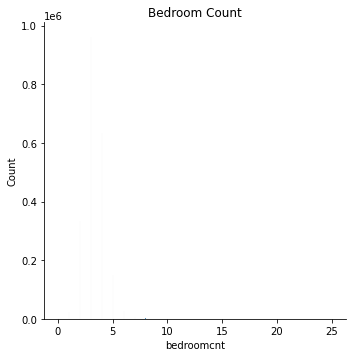

In [44]:
sns.displot(x='bedroomcnt', data=df)

plt.title('Bedroom Count')
plt.show()